In [ ]:
import chess #https://github.com/niklasf/python-chess
from stockfish import Stockfish

import chess.pgn
import pandas as pd
pd.options.display.max_columns=999
import datetime
import tqdm
import zipfile
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\aober\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# laod in games
games = pd.read_json("C:/Users/aober/Documents/Data_Science_Studium/4Semester/BigData/BigData_Chess_Project/data/pipeline_test/processed_games.json", orient='records', lines=True)

with open("../../testData/C:/Users/aober/Documents/Data_Science_Studium/4Semester/BigData/BigData_Chess_Project/data/pipeline_test/analyzed_positions.json", "r") as file:
    games_analysis = json.load(file) 
games_analysis = [pd.DataFrame(records) for records in games_analysis]


ValueError: Expected object or value

In [116]:
eco = pd.read_csv("../../testData/ECO.csv")

In [110]:
games_analysis[0:30]

[    taken  invalid  evaluation  evaluation_change  accuracy  taken_score  \
 0      []    False          22                 22       100            0   
 1      []    False          30                  8       100            0   
 2      []    False          33                  3       100            0   
 3      []    False          33                  0       100            0   
 4      []    False          30                 -3       100            0   
 5      []    False          31                  1       100            0   
 6     [n]    False           5                -26        75          300   
 7  [n, B]    False           7                  2       100            0   
 8  [n, B]    False         -14                -21       100            0   
 9  [n, B]    False          48                 62        50            0   
 
                                                  fen  \
 0  rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...   
 1  rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPP

In [117]:
eco_dict = eco.set_index('ECO Code')['Name'].to_dict()

games['sub_opening_name'] = games['ECO'].map(eco_dict)


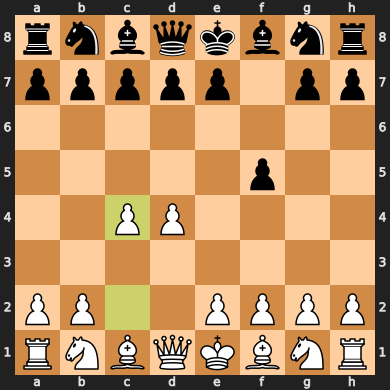

In [118]:
#Visualizazion of given game
game=games.iloc[900]

move_number=3
row={}
row['taken']=[]
board=chess.Board()
for san in game['moves'][:move_number]:
    parsed_san=board.parse_san(san)#move by the san "Standard Algebraic Notation"
    taken=board.piece_at(parsed_san.to_square)
    if taken:
        row['taken'].append(taken.__str__())
    move=board.push_san(san)
board

In [1]:
game_index = 1
df = pd.DataFrame(games_analysis[game_index]['evaluation_change'], columns=['evaluation_change'])
df2 = pd.DataFrame(games_analysis[game_index]['evaluation'], columns=['evaluation'])


# Assuming games_analysis[0]['evaluation_change'] is a list or similar structure
df['move_number'] = range(1, len(df) + 1)
df2['move_number'] = range(1, len(df) + 1)

plt.figure(figsize=(10, 6))
plt.bar(df['move_number'], df['evaluation_change'], color=df['evaluation_change'].apply(lambda x: 'blue' if x >= 0 else 'red'))
plt.xlabel('Move Number')
plt.ylabel('Evaluation Change')
plt.title('Evaluation Change per Move')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(df2['move_number'], df2['evaluation'], color=df2['evaluation'].apply(lambda x: 'blue' if x >= 0 else 'red'))
plt.xlabel('Move Number')
plt.ylabel('Evaluation')
plt.title('Evaluation')
plt.show()

biggest_change = 0
move = 1

for index, change in enumerate(df['evaluation_change'], start=1):
    # Check if the absolute value of the change is larger than the biggest_change
    if abs(change) > abs(biggest_change):
        biggest_change = change
        move = index

print(f"The largest change was {biggest_change} on move {move}.")
print(games_analysis[game_index]['url'][move])
        

NameError: name 'pd' is not defined

In [137]:
games_analysis[1]

,taken,invalid,evaluation,evaluation_change,accuracy,taken_score,fen,url,last_move
0,[],False,23,-25,100,0,rnbqkbnr/pppppppp/8/8/2P5/8/PP1PPPPP/RNBQKBNR ...,https://lichess.org/W4qIfyPj#1,c2c4
1,[],False,20,-3,100,0,rnbqkbnr/pppp1ppp/8/4p3/2P5/8/PP1PPPPP/RNBQKBN...,https://lichess.org/W4qIfyPj#2,e7e5
2,[],False,-216,-236,0,0,rnbqkbnr/pppp1ppp/8/2P1p3/8/8/PP1PPPPP/RNBQKBN...,https://lichess.org/W4qIfyPj#3,c4c5
3,[P],False,-208,8,100,-100,rnbqk1nr/pppp1ppp/8/2b1p3/8/8/PP1PPPPP/RNBQKBN...,https://lichess.org/W4qIfyPj#4,f8c5
4,[P],False,-232,-24,100,-100,rnbqk1nr/pppp1ppp/8/2b1p3/8/6P1/PP1PPP1P/RNBQK...,https://lichess.org/W4qIfyPj#5,g2g3
5,[P],False,-227,5,100,-100,rnbqk2r/pppp1ppp/5n2/2b1p3/8/6P1/PP1PPP1P/RNBQ...,https://lichess.org/W4qIfyPj#6,g8f6
6,[P],False,-233,-6,100,-100,rnbqk2r/pppp1ppp/5n2/2b1p3/8/6P1/PP1PPPBP/RNBQ...,https://lichess.org/W4qIfyPj#7,f1g2
7,[P],False,-237,-4,100,-100,rnbqk2r/ppp2ppp/5n2/2bpp3/8/6P1/PP1PPPBP/RNBQK...,https://lichess.org/W4qIfyPj#8,d7d5
8,[P],False,-273,-36,75,-100,rnbqk2r/ppp2ppp/5n2/2bpp3/8/1P4P1/P2PPPBP/RNBQ...,https://lichess.org/W4qIfyPj#9,b2b3
9,[P],False,-261,12,100,-100,rnbq1rk1/ppp2ppp/5n2/2bpp3/8/1P4P1/P2PPPBP/RNB...,https://lichess.org/W4qIfyPj#10,e8g8


In [125]:
games_white = games[0:1000][games['player_color'] == "White"]
agg_color_opening = games_white.groupby(['player_color', 'opening_name']).size().reset_index(name='count')
agg_color_opening_score = games_white.groupby(['opening_name', 'score']).size().reset_index(name='count')


games_black = games[0:1000][games['player_color'] == "Black"]
agg_color_opening = games_black.groupby(['player_color', 'opening_name']).size().reset_index(name='count')
agg_color_opening_score = games_black.groupby(['opening_name', 'score']).size().reset_index(name='count')



# Include the count of games per opening as well

In [69]:
games_black

,headers,moves,lichess_id,white_elo,black_elo,ECO,opening_name,event,player_color,score,sub_opening_name,average_accuracy
0,"{'_tag_roster': {'Event': 'Rated Bullet game',...","[e2e4, e7e5, g1f3, b8c6, f1b5, a7a6, b5c6, d7c...",https://lichess.org/R5xvWQmB,1393,1490,C68,"Ruy Lopez: Exchange Variation, Keres Variation",Rated Bullet game,Black,0.0,"Ruy Lopez, Exchange",92.5
1,"{'_tag_roster': {'Event': 'Rated Bullet game',...","[c2c4, e7e5, c4c5, f8c5, g2g3, g8f6, f1g2, d7d...",https://lichess.org/W4qIfyPj,1468,1485,A20,English Opening: King's English Variation,Rated Bullet game,Black,1.0,English,75.0
3,"{'_tag_roster': {'Event': 'Rated Bullet game',...","[e2e4, e7e5, g1f3, b8c6, f1c4, f8c5, b2b4, c5b...",https://lichess.org/vBCaaIq2,1549,1484,C52,"Italian Game: Evans Gambit, Pierce Defense",Rated Bullet game,Black,1.0,Evans Gambit,90.0
6,"{'_tag_roster': {'Event': 'Rated Bullet game',...","[d2d4, f7f5, c1f4, g8f6, g1f3, e7e6, e2e3, b7b...",https://lichess.org/zGzfZ9ew,1474,1464,A80,Dutch Defense,Rated Bullet game,Black,1.0,Dutch,87.5
9,"{'_tag_roster': {'Event': 'Rated Bullet game',...","[e2e4, e7e5, g1f3, b8c6, f1c4, f8c5, c2c3, g8f...",https://lichess.org/KEkOpdsl,1492,1483,C54,"Italian Game: Giuoco Piano, Greco's Attack",Rated Bullet game,Black,0.0,Giuoco Piano,95.0
10,"{'_tag_roster': {'Event': 'Rated Bullet game',...","[d2d4, f7f5, c1f4, g8f6, e2e3, e7e6, g1f3, f8e...",https://lichess.org/nItMHMv2,1493,1489,A80,Dutch Defense,Rated Bullet game,Black,0.0,Dutch,92.5
12,"{'_tag_roster': {'Event': 'Rated Bullet game',...","[e2e4, e7e5, f1c4, b8c6, d2d3, f8c5, c2c3, g8f...",https://lichess.org/t6kU1MF8,1469,1488,C23,Bishop's Opening,Rated Bullet game,Black,0.0,Bishop's Opening,97.5
14,"{'_tag_roster': {'Event': 'Rated Bullet game',...","[d2d4, f7f5, c2c4, g8f6, b1c3, e7e6, e2e3, f8b...",https://lichess.org/BcoQdj3B,1397,1478,A85,Dutch Defense: Queen's Knight Variation,Rated Bullet game,Black,1.0,"Dutch, with c4 & Nc3",77.5
17,"{'_tag_roster': {'Event': 'Rated Bullet game',...","[d2d3, e7e5, e2e4, b8c6, g1f3, f8c5, f1e2, g8f...",https://lichess.org/KuRI2yIi,1473,1473,C20,King's Pawn Game: Leonardis Variation,Rated Bullet game,Black,0.0,King's Pawn Game,87.5
18,"{'_tag_roster': {'Event': 'Rated Bullet game',...","[e2e4, e7e5, f2f4, e5f4, d2d4, g7g5, g1f3, f8e...",https://lichess.org/eT7BiAGe,1449,1467,C37,King's Gambit Accepted: Rosentreter Gambit,Rated Bullet game,Black,1.0,King's Gambit Accepted,45.0


In [127]:
#Plot accuracy per opening

#WHITE
index_white = games_white.index.tolist()
games_analysis10 = [games_analysis[i] for i in index_white]
games_white['average_accuracy'] = [np.mean(games_analysis10[i]["accuracy"]) for i in range(len(games_analysis10))]
# Now group by opening_name and calculate the mean of average_accuracy
agg_accuracy_opening = games_white.groupby('opening_name')['average_accuracy'].mean().reset_index(name='mean_accuracy')
agg_accuracy_opening['count'] = games_white.groupby('opening_name').size().reset_index(name='count')['count']

w_agg_accuracy_main_opening = games_white.groupby('sub_opening_name')['average_accuracy'].mean().reset_index(name='mean_accuracy')
w_agg_accuracy_main_opening['count'] = games_white.groupby('sub_opening_name').size().reset_index(name='count')['count']

#BLACK
index_black = games_black.index.tolist()
games_analysis_black = [games_analysis[i] for i in index_black]
games_black['average_accuracy'] = [np.mean(games_analysis_black[i]["accuracy"]) for i in range(len(games_analysis_black))]
# Now group by opening_name and calculate the mean of average_accuracy
agg_accuracy_opening_black = games_black.groupby('opening_name')['average_accuracy'].mean().reset_index(name='mean_accuracy')
agg_accuracy_opening_black['count'] = games_black.groupby('opening_name').size().reset_index(name='count')['count']

b_agg_accuracy_main_opening = games_black.groupby('sub_opening_name')['average_accuracy'].mean().reset_index(name='mean_accuracy')
b_agg_accuracy_main_opening['count'] = games_black.groupby('sub_opening_name').size().reset_index(name='count')['count']
b_agg_accuracy_main_opening = b_agg_accuracy_main_opening.sort_values('count', ascending=False)


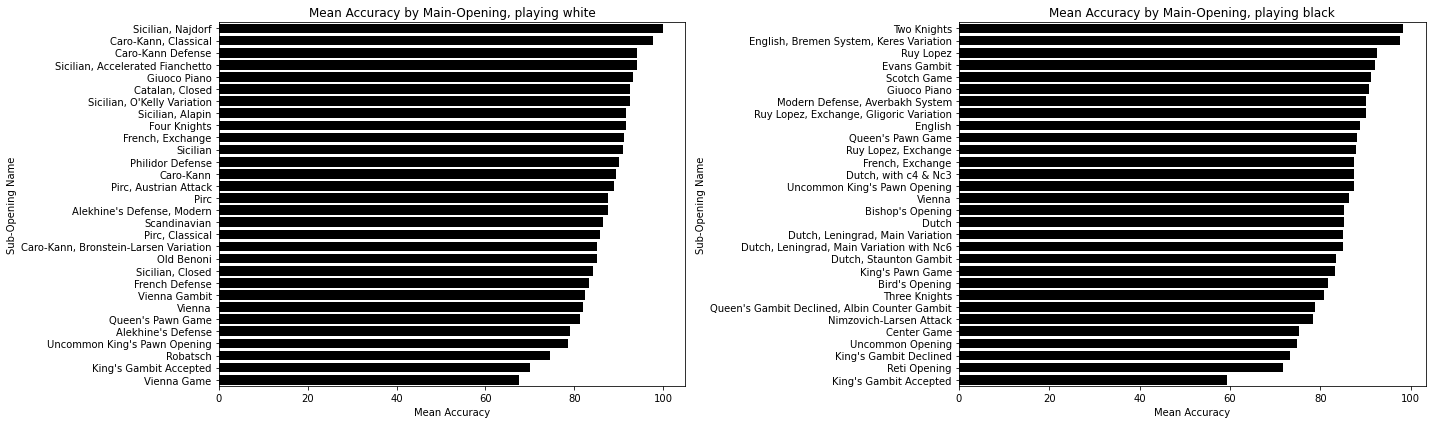

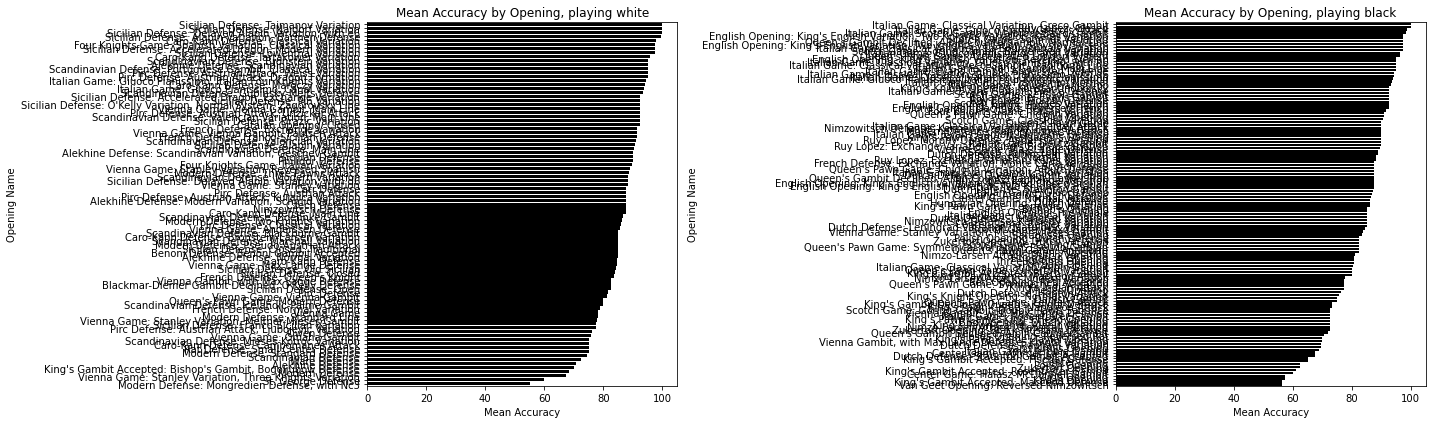

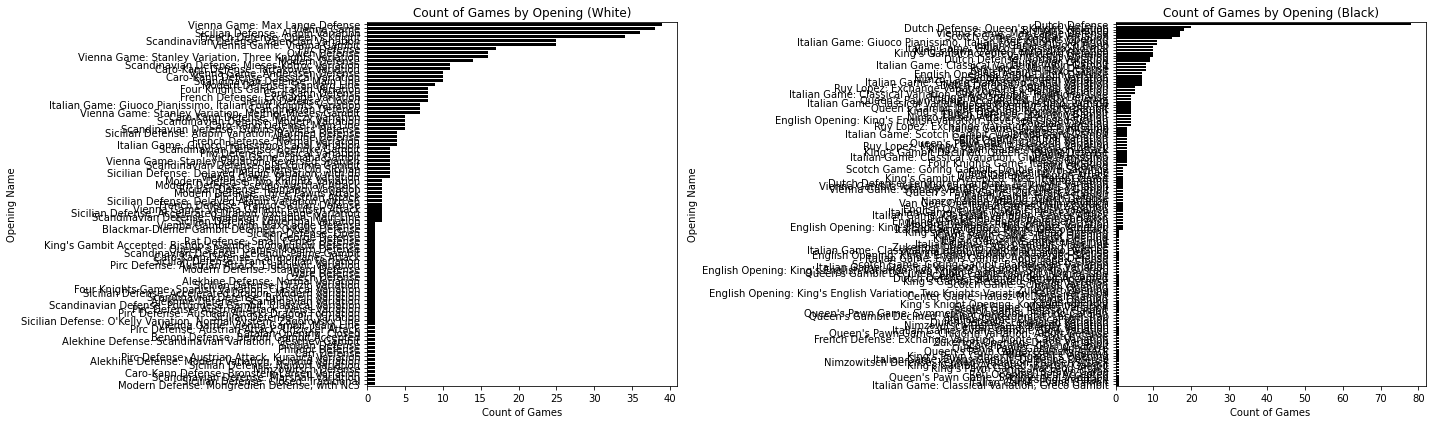

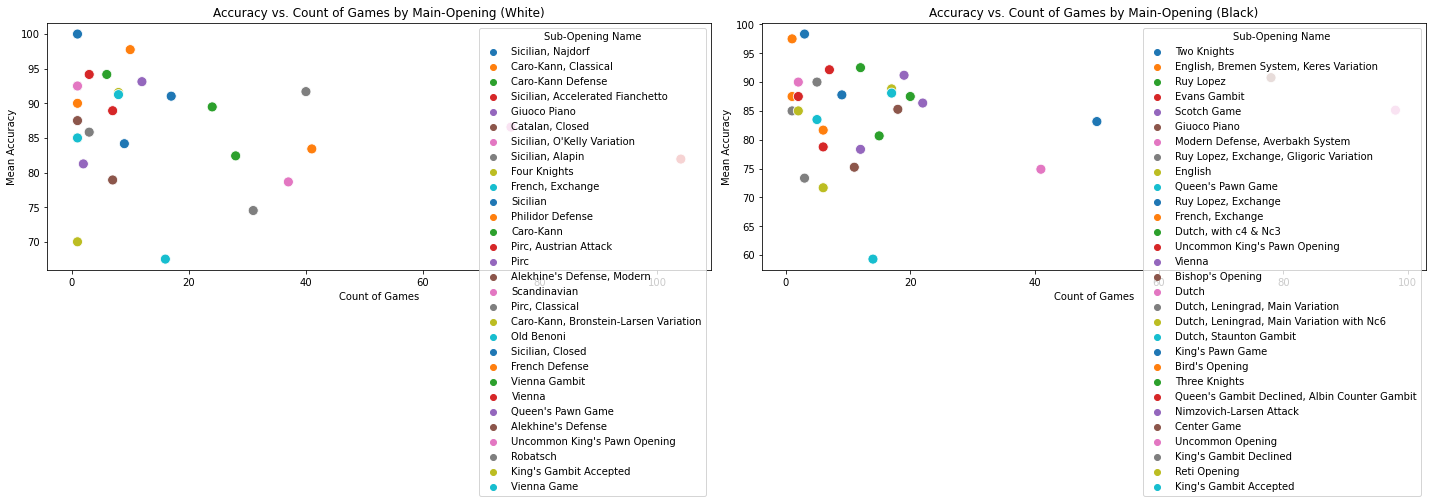

In [132]:
# Ensure the DataFrames are sorted by 'mean_accuracy'
agg_accuracy_opening = agg_accuracy_opening.sort_values('mean_accuracy', ascending=False)
agg_accuracy_opening_black = agg_accuracy_opening_black.sort_values('mean_accuracy', ascending=False)

w_agg_accuracy_main_opening = w_agg_accuracy_main_opening.sort_values('mean_accuracy', ascending=False)
b_agg_accuracy_main_opening = b_agg_accuracy_main_opening.sort_values('mean_accuracy', ascending=False)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot for playing white, using 'sub_opening_name'
sns.barplot(x='mean_accuracy', y='sub_opening_name', data=w_agg_accuracy_main_opening, color='black', ax=ax1)
ax1.set_title('Mean Accuracy by Main-Opening, playing white')
ax1.set_xlabel('Mean Accuracy')
ax1.set_ylabel('Sub-Opening Name')

# Plot for playing black, using 'sub_opening_name'
sns.barplot(x='mean_accuracy', y='sub_opening_name', data=b_agg_accuracy_main_opening, color='black', ax=ax2)
ax2.set_title('Mean Accuracy by Main-Opening, playing black')
ax2.set_xlabel('Mean Accuracy')
ax2.set_ylabel('Sub-Opening Name')

plt.tight_layout()
plt.show()
#PLOTS WHITE

agg_accuracy_opening = agg_accuracy_opening.sort_values('mean_accuracy', ascending=False)
agg_accuracy_opening_black = agg_accuracy_opening_black.sort_values('mean_accuracy', ascending=False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x='mean_accuracy', y='opening_name', data=agg_accuracy_opening, color='black', ax=ax1)
ax1.set_title('Mean Accuracy by Opening, playing white')
ax1.set_xlabel('Mean Accuracy')
ax1.set_ylabel('Opening Name')

black_palette = sns.light_palette("black", reverse=True, as_cmap=False)
sns.barplot(x='mean_accuracy', y='opening_name', data=agg_accuracy_opening_black, color='black', ax=ax2)
ax2.set_title('Mean Accuracy by Opening, playing black')
ax2.set_xlabel('Mean Accuracy')
ax2.set_ylabel('Opening Name')

plt.tight_layout()
plt.show()


agg_accuracy_opening = agg_accuracy_opening.sort_values('count', ascending=False)
agg_accuracy_opening_black = agg_accuracy_opening_black.sort_values('count', ascending=False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot for white
sns.barplot(x='count', y='opening_name', data=agg_accuracy_opening, color='black', ax=ax1)
ax1.set_title('Count of Games by Opening (White)')
ax1.set_xlabel('Count of Games')
ax1.set_ylabel('Opening Name')

# Plot for black
sns.barplot(x='count', y='opening_name', data=agg_accuracy_opening_black, color='black', ax=ax2)
ax2.set_title('Count of Games by Opening (Black)')
ax2.set_xlabel('Count of Games')
ax2.set_ylabel('Opening Name')

plt.tight_layout()
plt.show()


# Scatterplot Amount of games and accuracy for grouped openings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Scatter plot for playing white, with colors representing different sub-openings
sns.scatterplot(x='count', y='mean_accuracy', hue='sub_opening_name', data=w_agg_accuracy_main_opening, ax=ax1, palette='tab10', s=100)  # Adjust s for size
ax1.set_title('Accuracy vs. Count of Games by Main-Opening (White)')
ax1.set_xlabel('Count of Games')
ax1.set_ylabel('Mean Accuracy')
ax1.legend(title='Sub-Opening Name')

# Scatter plot for playing black, with colors representing different sub-openings
sns.scatterplot(x='count', y='mean_accuracy', hue='sub_opening_name', data=b_agg_accuracy_main_opening, ax=ax2, palette='tab10', s=100)  # Adjust s for size
ax2.set_title('Accuracy vs. Count of Games by Main-Opening (Black)')
ax2.set_xlabel('Count of Games')
ax2.set_ylabel('Mean Accuracy')
ax2.legend(title='Sub-Opening Name')

plt.tight_layout()
plt.show()



In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def load_json_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def create_dataframes_from_json(analyzed_games_json):
    games_analysis = []
    for game_json in analyzed_games_json:
        games_analysis.append(pd.read_json(game_json, orient='records'))
    return games_analysis

def plot_evaluation_changes_and_find_max_change(df, df2):
    plt.figure(figsize=(10, 6))
    plt.bar(df['move_number'], df['evaluation_change'], color=df['evaluation_change'].apply(lambda x: 'blue' if x >= 0 else 'red'))
    plt.xlabel('Move Number')
    plt.ylabel('Evaluation Change')
    plt.title('Evaluation Change per Move')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(df2['move_number'], df2['evaluation'], color=df2['evaluation'].apply(lambda x: 'blue' if x >= 0 else 'red'))
    plt.xlabel('Move Number')
    plt.ylabel('Evaluation')
    plt.title('Evaluation')
    plt.show()

    biggest_change = df['evaluation_change'].abs().max()
    move = df.loc[df['evaluation_change'].abs().idxmax()]['move_number']

    print(f"The largest change was {biggest_change} on move {move}.")
    # Assuming URL retrieval needs specific handling:
    # print(games_analysis[game_index]['url'][move])  # Update this line based on actual data structure for URLs.



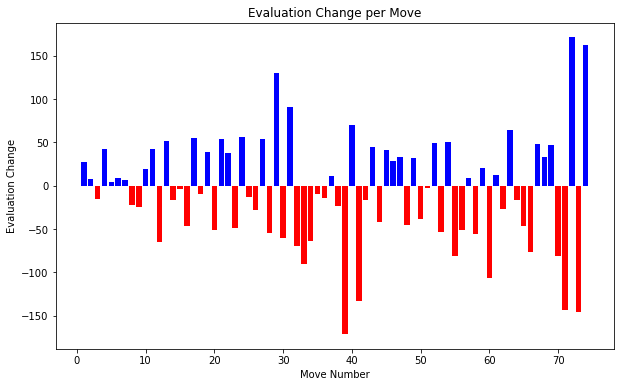

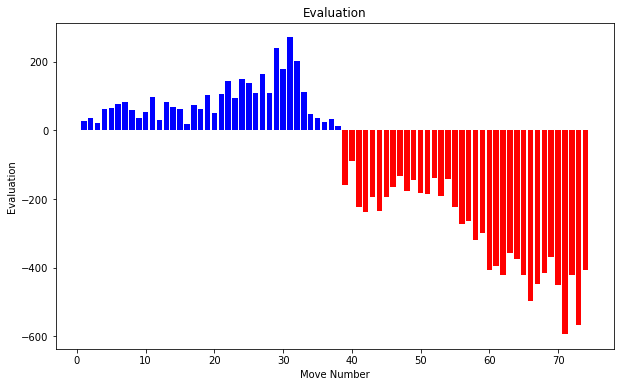

The largest change was 171 on move 39.


In [19]:

    # Load analyzed games from JSON
    analyzed_games_json = load_json_data("C:/Users/aober/Documents/Data_Science_Studium/4Semester/BigData/BigData_Chess_Project/data/pipeline_test/analyzed_positions.json")
    games_analysis = create_dataframes_from_json(analyzed_games_json)

    # Example usage with one specific game index
    game_index = 3
    df = pd.DataFrame(games_analysis[game_index]['evaluation_change'], columns=['evaluation_change'])
    df['move_number'] = range(1, len(df) + 1)
    
    df2 = pd.DataFrame(games_analysis[game_index]['evaluation'], columns=['evaluation'])
    df2['move_number'] = range(1, len(df2) + 1)
    
    plot_evaluation_changes_and_find_max_change(df, df2)


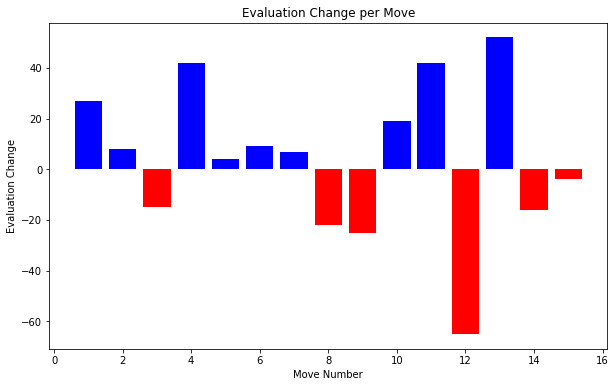

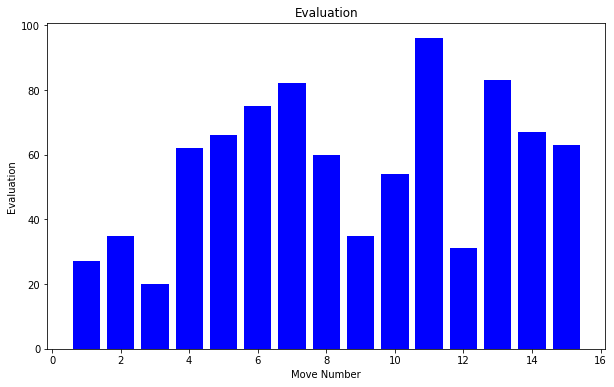

The largest change was 65 on move 12.


In [24]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def load_json_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def create_dataframes_from_json(analyzed_games_json):
    games_analysis = []
    for game_json in analyzed_games_json:
        games_analysis.append(pd.read_json(game_json, orient='records'))
    return games_analysis

def plot_evaluation_changes_and_find_max_change(df, df2):
    plt.figure(figsize=(10, 6))
    plt.bar(df['move_number'], df['evaluation_change'], color=df['evaluation_change'].apply(lambda x: 'blue' if x >= 0 else 'red'))
    plt.xlabel('Move Number')
    plt.ylabel('Evaluation Change')
    plt.title('Evaluation Change per Move')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(df2['move_number'], df2['evaluation'], color=df2['evaluation'].apply(lambda x: 'blue' if x >= 0 else 'red'))
    plt.xlabel('Move Number')
    plt.ylabel('Evaluation')
    plt.title('Evaluation')
    plt.show()

    biggest_change = df['evaluation_change'].abs().max()
    move = df.loc[df['evaluation_change'].abs().idxmax()]['move_number']

    print(f"The largest change was {biggest_change} on move {move}.")
    # Assuming URL retrieval needs specific handling:
    # print(games_analysis[game_index]['url'][move])  # Update this line based on actual data structure for URLs.

def filter_opening_stage(df):
    return df[df['game_stage'] == 'opening']

# Load analyzed games from JSON
analyzed_games_json = load_json_data("C:/Users/aober/Documents/Data_Science_Studium/4Semester/BigData/BigData_Chess_Project/data/pipeline_test/analyzed_positions.json")
games_analysis = create_dataframes_from_json(analyzed_games_json)

# Example usage with one specific game index
game_index = 3
game_df = games_analysis[game_index]

# Filter to only include rows where the game stage is 'opening'
game_df_opening = filter_opening_stage(game_df)

# Create dataframes for evaluation change and evaluation
df = game_df_opening[['evaluation_change']].copy()
df['move_number'] = range(1, len(df) + 1)

df2 = game_df_opening[['evaluation']].copy()
df2['move_number'] = range(1, len(df2) + 1)

plot_evaluation_changes_and_find_max_change(df, df2)


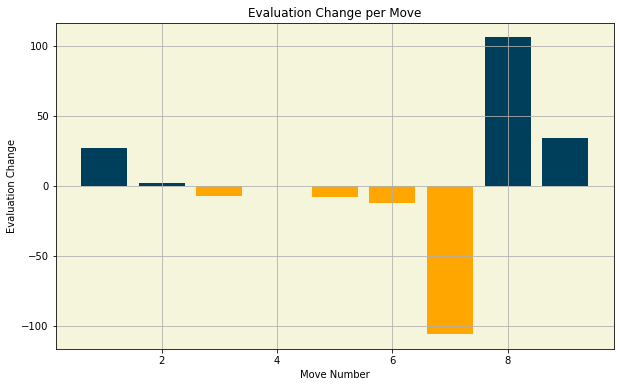

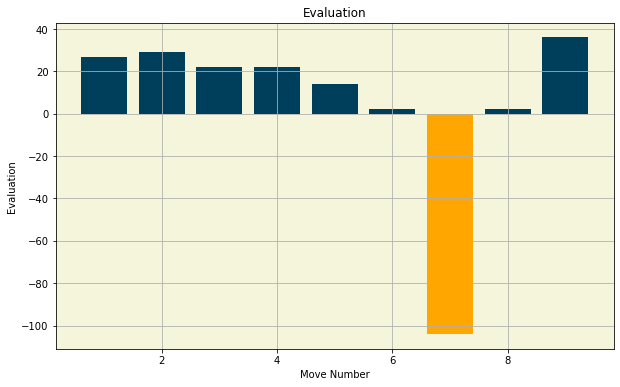

The largest change was 106 on move 7.


In [49]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def load_json_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def create_dataframes_from_json(analyzed_games_json):
    games_analysis = []
    for game_json in analyzed_games_json:
        games_analysis.append(pd.read_json(game_json, orient='records'))
    return games_analysis

def plot_evaluation_changes_and_find_max_change(df, df2):
    # Define the colors to match the provided plot
    positive_color = '#003f5c'  # Dark blue color for positive changes
    negative_color = '#ffa600'  # Orange color for negative changes

    # Plot evaluation changes
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_facecolor('beige')
    ax.bar(df['move_number'], df['evaluation_change'], color=df['evaluation_change'].apply(lambda x: positive_color if x >= 0 else negative_color))
    ax.set_xlabel('Move Number')
    ax.set_ylabel('Evaluation Change')
    ax.set_title('Evaluation Change per Move')
    ax.grid(True)
    plt.show()

    # Plot evaluation
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_facecolor('beige')
    ax.bar(df2['move_number'], df2['evaluation'], color=df2['evaluation'].apply(lambda x: positive_color if x >= 0 else negative_color))
    ax.set_xlabel('Move Number')
    ax.set_ylabel('Evaluation')
    ax.set_title('Evaluation')
    ax.grid(True)
    plt.show()

    biggest_change = df['evaluation_change'].abs().max()
    move = df.loc[df['evaluation_change'].abs().idxmax()]['move_number']

    print(f"The largest change was {biggest_change} on move {move}.")
    # Assuming URL retrieval needs specific handling:
    # print(games_analysis[game_index]['url'][move])  # Update this line based on actual data structure for URLs.

def filter_opening_stage(df):
    return df[df['game_stage'] == 'opening']

# Load analyzed games from JSON
analyzed_games_json = load_json_data("C:/Users/aober/Documents/Data_Science_Studium/4Semester/BigData/BigData_Chess_Project/data/pipeline_test/analyzed_positions.json")
games_analysis = create_dataframes_from_json(analyzed_games_json)

# Example usage with one specific game index
game_index = 22
game_df = games_analysis[game_index]
# Filter to only include rows where the game stage is 'opening'
game_df_opening = filter_opening_stage(game_df)
# Create dataframes for evaluation change and evaluation
df = game_df_opening[['evaluation_change']].copy()
df['move_number'] = range(1, len(df) + 1)
df2 = game_df_opening[['evaluation']].copy()
df2['move_number'] = range(1, len(df2) + 1)
plot_evaluation_changes_and_find_max_change(df, df2)
